# Climatologie

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

## Fonction utile

In [2]:
def F_to_Celcius(fahr: int):
    return (fahr-32) * 5/9

# Import du CSV et Nettoyage du dataset

In [3]:
raw_file = '../datas/RAW/temperatures.csv'
temperature = pd.read_csv(raw_file)
del(raw_file)

temperature = temperature[ (temperature['Year'] >= 1995) & (temperature['Year'] <= 2019) ]

temperature['AvgTemperature'] = temperature['AvgTemperature'].replace(-99, np.NaN)
temperature['AvgTemperature'].interpolate(method='linear', inplace=True)
temperature['AvgTemperature'] = temperature['AvgTemperature'].apply(F_to_Celcius)

temperature = temperature[ temperature.Day != 0 ]



# Contenu du dataset

In [4]:
print(
    [x for x in temperature.columns]
)
for col in temperature.columns:
    if col == 'AvgTemperature':
        pass
    print('Il y a', str(temperature[col].nunique()), '\t', col, 'dans la table')
del(col)

print(
    '\nAnnée min', temperature['Year'].min()
    , '\nAnnée max', temperature['Year'].max()
)

print('\nLa colonne des états a', round(100 - temperature['State'].count()/temperature['State'].size*100, 1), "% de valeurs nulles")

['Region', 'Country', 'State', 'City', 'Month', 'Day', 'Year', 'AvgTemperature']
Il y a 7 	 Region dans la table
Il y a 125 	 Country dans la table
Il y a 52 	 State dans la table
Il y a 321 	 City dans la table
Il y a 12 	 Month dans la table
Il y a 31 	 Day dans la table
Il y a 25 	 Year dans la table
Il y a 46238 	 AvgTemperature dans la table

Année min 1995 
Année max 2019

La colonne des états a 50.0 % de valeurs nulles


# Analyse

## Les températures moyennes françaises de 1995 à 2019

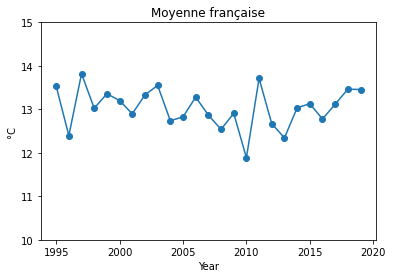

In [5]:
france = temperature[ (temperature['Country'] == 'France') & (temperature['Year'] >= 1995) & (temperature['Year'] <= 2019) ]
france = france.groupby('Year')['AvgTemperature'].mean().plot(ylim=(10,15), marker='o', ylabel='°C', title='Moyenne française')
del(france)

## L'évolution moyenne de la température chaque mois de l'année (sur toutes les années donc) de chaque région du globe (à l'aide de subplots, soit plusieurs diagrammes sur un seul affichage)

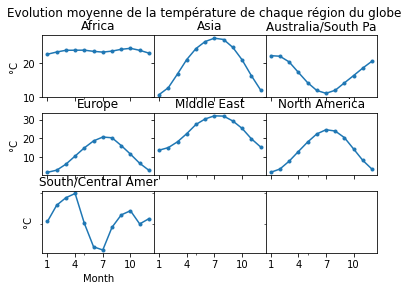

In [6]:
fig, axs = plt.subplots(3, 3, sharex='col', sharey='row', gridspec_kw={'hspace': 0.25, 'wspace': 0})
fig.suptitle("Evolution moyenne de la température de chaque région du globe")
axs = axs.flat
regions = temperature.groupby('Region')

for region, ax in zip(regions, axs):
    ax.set_title(region[0][:18])
    ax.set_ylabel('°C')
    ax.set_xlabel('Mois')
    ax.set_yticks(list(range(0, 31, 10)))
    ax.set_xticks(list(range(1, 12, 3)))
    region[1].groupby('Month')['AvgTemperature'].mean().plot(ax=ax, marker='.')

plt.show()

del(fig, axs, ax, regions, region)

## Le classement graphique des pays les plus chauds au monde

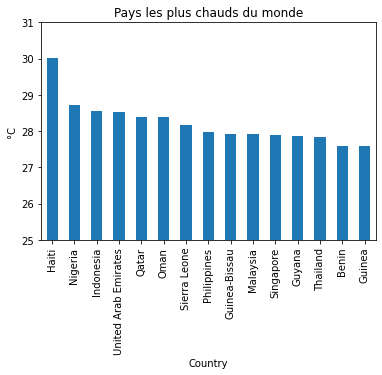

In [7]:
pays_chaud = temperature.copy().groupby('Country')
pays_chaud = pays_chaud['AvgTemperature'].mean().nlargest(15)

pays_chaud.plot(kind='bar', ylim=(25,31), ylabel='°C', title='Pays les plus chauds du monde');

del(pays_chaud)

## Le classement graphique des pays les plus froids au monde

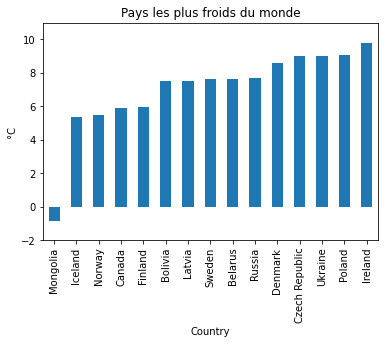

In [8]:
pays_froid = temperature.groupby('Country')
pays_froid = pays_froid['AvgTemperature'].mean().nsmallest(15)

pays_froid.plot(kind='bar', ylim=(-2,11), ylabel='°C', title='Pays les plus froids du monde');

del(pays_froid)

## L'évolution des températures entre le pays le plus chaud et le pays le plus froid de 1995 à 2019 sur un même graphique

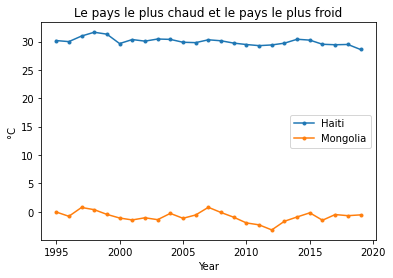

In [9]:
temp_moy = temperature.groupby('Country')['AvgTemperature'].mean()

pays_froid = temp_moy.nsmallest(1).index[0]
pays_chaud = temp_moy.nlargest(1).index[0]

df = temperature[ (temperature['Country'] == pays_froid) | (temperature['Country'] == pays_chaud) ]

for country in df.groupby('Country'):
    country[1].groupby('Year')['AvgTemperature'].mean().plot(marker='.', legend=True, label=country[0], ylabel='°C', title='Le pays le plus chaud et le pays le plus froid')

del(pays_chaud, pays_froid, df, country, temp_moy)

## L'évolution de la température moyenne de la ville de Paris.

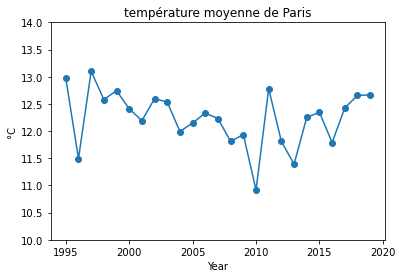

In [10]:
temp_paris = temperature[ temperature['City'] == 'Paris' ]
temp_paris.groupby('Year')['AvgTemperature'].mean().plot(marker='o', ylim=(10,14), ylabel='°C', title='température moyenne de Paris');

del(temp_paris)

## La température moyenne de chaque pays sur une carte sur la période 2010-2019

Country
Albania      19
Algeria      19
Argentina    19
Australia    19
Austria      11
Name: AvgTemperature, dtype: int64
Fiji
Western Sahara
United States of America
Papua New Guinea
Chile
Democratic Republic of the Congo
Somalia
Sudan
Chad
Falkland Islands
Greenland
French Southern and Antarctic Lands
East Timor
Lesotho
El Salvador
Ecuador
Puerto Rico
Jamaica
Zimbabwe
Botswana
Mali
Niger
Cameroon
Ghana
Liberia
Burkina Faso
Republic of the Congo
Equatorial Guinea
eSwatini
Angola
Palestine
The Gambia
Iraq
Vanuatu
Cambodia
Myanmar
Bhutan
Afghanistan
Iran
Armenia
Moldova
Lithuania
Estonia
Luxembourg
Netherlands
New Caledonia
Solomon Islands
People's Republic of China
Azerbaijan
Brunei
Slovenia
Eritrea
Paraguay
Yemen
Antarctica
Turkish Republic of Northern Cyprus
Libya
Djibouti
Somaliland
Rwanda
Bosnia and Herzegovina
Republic of Macedonia
Serbia
Montenegro
Kosovo
Trinidad and Tobago
South Sudan
Saved: maps/Température des pays du monde.png


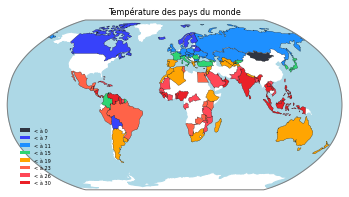

In [17]:
from math import floor, ceil

# nb_step = 4
# colors = ['#1FB1CB','#42B14E', '#DAA715','#fe2ea5','#FE0000']
nb_step = 8
colors = ['#2f3542', '#3742fa', '#1e90ff', '#2ed573', '#ffa502', '#ff6348', '#ff4757', '#EA2027']

temp_moy = temperature.groupby('Country')['AvgTemperature'].mean()
step = ( abs(temp_moy.min()) + abs(temp_moy.max()) )/ nb_step

split_countries = lambda x: int(ceil(x/step)*step)
temp_moy = temp_moy.apply(split_countries)

print(temp_moy.head())

import country_converter as coco

some_names = temp_moy.index
print(some_names)

import map_cartopy as mapc

projection = mapc.ccrs.Robinson()
title = 'Température des pays du monde'
mapc.plot_countries(temp_moy, projection, colors, title)

del(colors, floor, ceil, mapc, projection, title, split_countries, step, nb_step)

In [12]:
import cartopy.io.shapereader as shpreader

shpfilename = shpreader.natural_earth(resolution='110m', category='cultural', name='admin_0_countries')
reader = shpreader.Reader(shpfilename)
countries = reader.records()
countries = [ p.attributes['NAME_EN'] for p in countries] 
countries = sorted(countries)

del(reader, shpfilename, shpreader)

In [13]:
countries.remove('Armenia')

In [14]:
temperature['Country'] = temperature['Country'].replace('Bahamas', 'The Bahamas')

nb_step = 8
temp_moy = temperature.groupby('Country')['AvgTemperature'].mean()
step = ( abs(temp_moy.min()) + abs(temp_moy.max()) )/ nb_step
split_countries = lambda x: int(round(x/step)*step)
temp_moy = temp_moy.apply(split_countries)
# df.replace([0, 1, 2, 3], [4, 3, 2, 1])

menfou = True

print('Connus \t\t à Supp\n')
for c, t in zip(temp_moy.index, countries):
    if c == t and menfou:
        pass
    else:
        menfou = False
        print(c, '\t', t)

Connus 		 à Supp

Albania 	 Afghanistan
Algeria 	 Albania
Argentina 	 Algeria
Australia 	 Angola
Austria 	 Antarctica
Bahrain 	 Argentina
Bangladesh 	 Australia
Barbados 	 Austria
Belarus 	 Azerbaijan
Belgium 	 Bangladesh
Belize 	 Belarus
Benin 	 Belgium
Bermuda 	 Belize
Bolivia 	 Benin
Brazil 	 Bhutan
Bulgaria 	 Bolivia
Burundi 	 Bosnia and Herzegovina
Canada 	 Botswana
Central African Republic 	 Brazil
China 	 Brunei
Colombia 	 Bulgaria
Congo 	 Burkina Faso
Costa Rica 	 Burundi
Croatia 	 Cambodia
Cuba 	 Cameroon
Cyprus 	 Canada
Czech Republic 	 Central African Republic
Denmark 	 Chad
Dominican Republic 	 Chile
Egypt 	 Colombia
Equador 	 Costa Rica
Ethiopia 	 Croatia
Finland 	 Cuba
France 	 Cyprus
Gabon 	 Czech Republic
Gambia 	 Democratic Republic of the Congo
Georgia 	 Denmark
Germany 	 Djibouti
Greece 	 Dominican Republic
Guatemala 	 East Timor
Guinea 	 Ecuador
Guinea-Bissau 	 Egypt
Guyana 	 El Salvador
Haiti 	 Equatorial Guinea
Honduras 	 Eritrea
Hong Kong 	 Estonia
Hungary 	 Ethi

In [15]:
countries

['Afghanistan',
 'Albania',
 'Algeria',
 'Angola',
 'Antarctica',
 'Argentina',
 'Australia',
 'Austria',
 'Azerbaijan',
 'Bangladesh',
 'Belarus',
 'Belgium',
 'Belize',
 'Benin',
 'Bhutan',
 'Bolivia',
 'Bosnia and Herzegovina',
 'Botswana',
 'Brazil',
 'Brunei',
 'Bulgaria',
 'Burkina Faso',
 'Burundi',
 'Cambodia',
 'Cameroon',
 'Canada',
 'Central African Republic',
 'Chad',
 'Chile',
 'Colombia',
 'Costa Rica',
 'Croatia',
 'Cuba',
 'Cyprus',
 'Czech Republic',
 'Democratic Republic of the Congo',
 'Denmark',
 'Djibouti',
 'Dominican Republic',
 'East Timor',
 'Ecuador',
 'Egypt',
 'El Salvador',
 'Equatorial Guinea',
 'Eritrea',
 'Estonia',
 'Ethiopia',
 'Falkland Islands',
 'Fiji',
 'Finland',
 'France',
 'French Southern and Antarctic Lands',
 'Gabon',
 'Georgia',
 'Germany',
 'Ghana',
 'Greece',
 'Greenland',
 'Guatemala',
 'Guinea',
 'Guinea-Bissau',
 'Guyana',
 'Haiti',
 'Honduras',
 'Hungary',
 'Iceland',
 'India',
 'Indonesia',
 'Iran',
 'Iraq',
 'Ireland',
 'Israel',
 'I

# Deeplearning

In [16]:
# Voir SVM !
# Regression sur time series